# COMM7370 AI Theories and Applications
# Search Algorithms

## Uninformed Search
Implementation of the basic uninformed search algorithms using `NetworkX`library

In [5]:
# Install NetworkX, Matplotlib, Pandas, Numpy using pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Visit the graph using Depth First Algorithm

## Basic DFS

In [7]:
def DFS(graph, startNode, endNode, maxSteps):
    # Initialisation
    fringe = []
    step = 0
    for node in graph.nodes:
        graph.nodes[node]['parent'] = False
        graph.nodes[node]['visited'] = False
    
    for edge in graph.edges:
        graph.edges[edge]['visited'] = False
        
    # Setup starting point, root of the tree
    fringe.append(startNode)
    graph.nodes[startNode]['parent'] = None
    
    # Execute until there are nodes to be visited
    while fringe:
        print('Fringe:', fringe)
        
        #Extract a node from the fringe and visit the node
        currentNode = fringe.pop()
        step += 1
        
        # Check goal
        if not(currentNode == endNode): 
            # Check condition
            if step <= maxSteps:
                print(currentNode, " -> ")
                graph.nodes[currentNode]['visited'] = True
                
                # Add to fringe neighbouring nodes
                for neighbour in graph.adj[currentNode]:
                    fringe.append(neighbour)
                    graph.nodes[neighbour]['parent'] = currentNode
                    graph.edges[currentNode,neighbour]['visited'] = True
                    
            else:
                print(" Execution ended without reaching the goal")
                break
        else:
            print(currentNode, " *GOAL* - Number of steps:", step)
            break
        
    print("- End")
    return graph

### Improved DFS

In [20]:
def DFS_with_loop_prevention(graph, startNode, endNode, maxSteps):
    # Initialization
    # Use visited flag on each node to find if we should consider it for fring expansion
    fringe = []
    step = 0
    
     #  ---------
    step_distance = 0 
    total_distance = 0 
    #  ---------
    
    for node in graph.nodes:
        graph.nodes[node]['parent'] = False
        graph.nodes[node]['visited'] = False
    
    for edge in graph.edges:
        graph.edges[edge]['visited'] = False
        
    # Setup starting point, root of the tree
    fringe.append(startNode)
    graph.nodes[startNode]['parent'] = None
    #graph.nodes[startNode]['visited'] = True
    print(startNode, " -> ")
    
    # Execute until there are nodes to be visited
    while fringe:
        print('Fringe:', fringe)
        
        #Extract a node from the fringe and visit the node
        currentNode = fringe.pop()
        if graph.nodes[currentNode]['visited'] == False: # Why this is needed????
            step += 1
            
             # ---------
            if not graph.nodes[currentNode]['parent'] == None: #the startNode 'Arab' has no 'parent'
                
                #use 'weight' of edge between currentNode and its parent node to represent the 'distance'
                step_distance = graph.edges[currentNode, graph.nodes[currentNode]['parent']]['weight']
                print('From', graph.nodes[currentNode]['parent'],'to', currentNode,'| Distance:', step_distance)
                graph.edges[graph.nodes[currentNode]['parent'],currentNode]['visited'] = True
                #count the total distance
                total_distance = total_distance + step_distance
                
            else:
                print('No Parent Node')
            # ---------

            # Check goal
            if not(currentNode == endNode): 
                # Check condition
                if step <= maxSteps:
                    # Update the visited flag if needed
                    if(not graph.nodes[currentNode]['visited']):
                        print(currentNode, " -> ")
                        graph.nodes[currentNode]['visited'] = True

                    # Add to fringe neighbouring nodes, if not visited
                    for neighbour in graph.adj[currentNode]:
                        if not graph.nodes[neighbour]['visited']:
                            fringe.append(neighbour)
                            graph.nodes[neighbour]['parent'] = currentNode
                            
                else:
                    print(" Execution ended without reaching the goal")
                    
                    #  ---------
                    print(' Total distance:',total_distance)
                    #  ---------
                    
                    break
            else:
                print(currentNode, " *GOAL* - Number of steps:", step)
                
                #  ---------
                print(' Total distance:',total_distance)
                
                #  ---------
                break
        
    print(" - End")
    return graph

# Travelling in Romania 
Import the adjacency matrix from CSV file. 

In [21]:
dfRomania = pd.read_csv('../data/' + 'romania.csv')

In [22]:
dfRomania

,city,Arad,Bucharest,Craiova,Drobeta,Eforie,Fagaras,Giurgiu,Hirsova,Iasi,...,Mehadia,Neamt,Oradea,Pitesti,Rimnicu,Sibiu,Timisoara,Urziceni,Vaslui,Zerind
0,Arad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,140.0,118.0,NaN,NaN,75.0
1,Bucharest,NaN,NaN,NaN,NaN,NaN,211.0,90.0,NaN,NaN,...,NaN,NaN,NaN,101.0,NaN,NaN,NaN,85.0,NaN,NaN
2,Craiova,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,138.0,146.0,NaN,NaN,NaN,NaN,NaN
3,Drobeta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Eforie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fagaras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN
6,Giurgiu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Hirsova,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN
8,Iasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,NaN
9,Lugoj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.0,NaN,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN


Change NA to 0, needed for NetworkX graph.

In [23]:
dfRomania.fillna(0, inplace=True)
dfRomania.set_index('city', inplace = True)
dfRomania

,Arad,Bucharest,Craiova,Drobeta,Eforie,Fagaras,Giurgiu,Hirsova,Iasi,Lugoj,Mehadia,Neamt,Oradea,Pitesti,Rimnicu,Sibiu,Timisoara,Urziceni,Vaslui,Zerind
city,,,,,,,,,,,,,,,,,,,,
Arad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,118.0,0.0,0.0,75.0
Bucharest,0.0,0.0,0.0,0.0,0.0,211.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,0.0,0.0,0.0,85.0,0.0,0.0
Craiova,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,146.0,0.0,0.0,0.0,0.0,0.0
Drobeta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eforie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fagaras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0
Giurgiu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hirsova,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0
Iasi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0


Convert Pandas DataFrame to NetworkX Graph

In [24]:
romaniaMap = nx.from_pandas_adjacency(dfRomania, nx.Graph)

In [25]:
romaniaMap.edges(data=True)

EdgeDataView([('Arad', 'Sibiu', {'weight': 140.0}), ('Arad', 'Timisoara', {'weight': 118.0}), ('Arad', 'Zerind', {'weight': 75.0}), ('Bucharest', 'Fagaras', {'weight': 211.0}), ('Bucharest', 'Giurgiu', {'weight': 90.0}), ('Bucharest', 'Pitesti', {'weight': 101.0}), ('Bucharest', 'Urziceni', {'weight': 85.0}), ('Craiova', 'Drobeta', {'weight': 120.0}), ('Craiova', 'Pitesti', {'weight': 138.0}), ('Craiova', 'Rimnicu', {'weight': 146.0}), ('Drobeta', 'Mehadia', {'weight': 75.0}), ('Eforie', 'Hirsova', {'weight': 86.0}), ('Fagaras', 'Sibiu', {'weight': 99.0}), ('Hirsova', 'Urziceni', {'weight': 98.0}), ('Iasi', 'Neamt', {'weight': 87.0}), ('Iasi', 'Vaslui', {'weight': 92.0}), ('Lugoj', 'Mehadia', {'weight': 70.0}), ('Lugoj', 'Timisoara', {'weight': 111.0}), ('Oradea', 'Sibiu', {'weight': 151.0}), ('Oradea', 'Zerind', {'weight': 71.0}), ('Pitesti', 'Rimnicu', {'weight': 97.0}), ('Rimnicu', 'Sibiu', {'weight': 80.0}), ('Urziceni', 'Vaslui', {'weight': 142.0})])

In [26]:
edgesToRemove = []
for edge in romaniaMap.edges(data=True):
    start = edge[0]
    end = edge[1]
    weight = edge[2]['weight']
    if np.isnan(weight):
        print(edge)
        edgesToRemove.append( (start,end) )

romaniaMap.remove_edges_from(edgesToRemove)

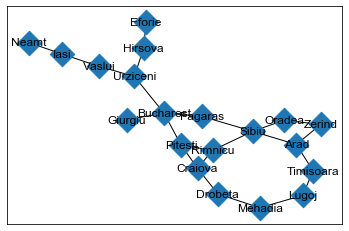

In [27]:
layout=nx.spring_layout(romaniaMap)
nx.draw_networkx(romaniaMap, layout, node_shape='D', with_labels=True)

In [28]:
visitedGraph = DFS(romaniaMap, 'Arad', 'Bucharest', 100)

Fringe: ['Arad']
Arad  -> 
Fringe: ['Sibiu', 'Timisoara', 'Zerind']
Zerind  -> 
Fringe: ['Sibiu', 'Timisoara', 'Arad', 'Oradea']
Oradea  -> 
Fringe: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Zerind']
Zerind  -> 
Fringe: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Oradea  -> 
Fringe: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Zerind']
Zerind  -> 
Fringe: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Oradea  -> 
Fringe: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Zerind']
Zerind  -> 
Fringe: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Oradea  -> 
Fringe: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Zerind']
Zerind  -> 
Fringe: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Oradea  -> 
Fringe: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu'

In [29]:
visitedGraph.edges(data=True)

EdgeDataView([('Arad', 'Sibiu', {'weight': 140.0, 'visited': True}), ('Arad', 'Timisoara', {'weight': 118.0, 'visited': True}), ('Arad', 'Zerind', {'weight': 75.0, 'visited': True}), ('Bucharest', 'Fagaras', {'weight': 211.0, 'visited': False}), ('Bucharest', 'Giurgiu', {'weight': 90.0, 'visited': False}), ('Bucharest', 'Pitesti', {'weight': 101.0, 'visited': False}), ('Bucharest', 'Urziceni', {'weight': 85.0, 'visited': False}), ('Craiova', 'Drobeta', {'weight': 120.0, 'visited': False}), ('Craiova', 'Pitesti', {'weight': 138.0, 'visited': False}), ('Craiova', 'Rimnicu', {'weight': 146.0, 'visited': False}), ('Drobeta', 'Mehadia', {'weight': 75.0, 'visited': False}), ('Eforie', 'Hirsova', {'weight': 86.0, 'visited': False}), ('Fagaras', 'Sibiu', {'weight': 99.0, 'visited': False}), ('Hirsova', 'Urziceni', {'weight': 98.0, 'visited': False}), ('Iasi', 'Neamt', {'weight': 87.0, 'visited': False}), ('Iasi', 'Vaslui', {'weight': 92.0, 'visited': False}), ('Lugoj', 'Mehadia', {'weight': 70

In [30]:
visitedGraph = DFS_with_loop_prevention(romaniaMap, 'Arad', 'Bucharest', 100)

Arad  -> 
Fringe: ['Arad']
No Parent Node
Arad  -> 
Fringe: ['Sibiu', 'Timisoara', 'Zerind']
From Arad to Zerind | Distance: 75.0
Zerind  -> 
Fringe: ['Sibiu', 'Timisoara', 'Oradea']
From Zerind to Oradea | Distance: 71.0
Oradea  -> 
Fringe: ['Sibiu', 'Timisoara', 'Sibiu']
From Oradea to Sibiu | Distance: 151.0
Sibiu  -> 
Fringe: ['Sibiu', 'Timisoara', 'Fagaras', 'Rimnicu']
From Sibiu to Rimnicu | Distance: 80.0
Rimnicu  -> 
Fringe: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Pitesti']
From Rimnicu to Pitesti | Distance: 97.0
Pitesti  -> 
Fringe: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Craiova']
From Pitesti to Craiova | Distance: 138.0
Craiova  -> 
Fringe: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Drobeta']
From Craiova to Drobeta | Distance: 120.0
Drobeta  -> 
Fringe: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Mehadia']
From Drobeta to Mehadia | Distance: 75.0
Mehadia  -> 
Fringe: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Buch

In [31]:
visitedGraph.edges(data=True)

EdgeDataView([('Arad', 'Sibiu', {'weight': 140.0, 'visited': False}), ('Arad', 'Timisoara', {'weight': 118.0, 'visited': False}), ('Arad', 'Zerind', {'weight': 75.0, 'visited': True}), ('Bucharest', 'Fagaras', {'weight': 211.0, 'visited': False}), ('Bucharest', 'Giurgiu', {'weight': 90.0, 'visited': False}), ('Bucharest', 'Pitesti', {'weight': 101.0, 'visited': True}), ('Bucharest', 'Urziceni', {'weight': 85.0, 'visited': False}), ('Craiova', 'Drobeta', {'weight': 120.0, 'visited': True}), ('Craiova', 'Pitesti', {'weight': 138.0, 'visited': True}), ('Craiova', 'Rimnicu', {'weight': 146.0, 'visited': False}), ('Drobeta', 'Mehadia', {'weight': 75.0, 'visited': True}), ('Eforie', 'Hirsova', {'weight': 86.0, 'visited': False}), ('Fagaras', 'Sibiu', {'weight': 99.0, 'visited': False}), ('Hirsova', 'Urziceni', {'weight': 98.0, 'visited': False}), ('Iasi', 'Neamt', {'weight': 87.0, 'visited': False}), ('Iasi', 'Vaslui', {'weight': 92.0, 'visited': False}), ('Lugoj', 'Mehadia', {'weight': 70.0

# Exercise 2 (5%)
Add a visited attribute to the graph edges. It should contain boolean values in {`True`, `False`} or {`1`, `0`} depending if the edge has been visited by the algorithm.

- Course Instructor: Dr. Paolo Mengoni (Visiting Scholar, School of Communication, Hong Kong Baptist University) 
  - pmengoni@hkbu.edu.hk

- The codes in this notebook take insipiration from various sources. All codes are for educational purposes only and released under the CC1.0. 